In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import seaborn as sns

In [8]:
# Combine CSV files
file_path_1 = '../data/2024-08-22-mac.csv'
file_path_2 = '../data/2024-08-22-windows.csv'
output_file_path = '../data/2024-08-22-combined.csv'

df_mac = pd.read_csv(file_path_1)
df_windows = pd.read_csv(file_path_2)

df_combined = df_mac._append(df_windows, ignore_index=True)

df_combined.to_csv(output_file_path, index=False)

In [36]:
# Read CSV file
data = pd.read_csv('../data/2024-08-22-combined.csv')
print(f'{len(data)} rows')

1701760 rows


## Histograms

In [73]:
filtered_data = data[
    (data["Blood pressure hypotension"] == 'normal') &
    (data['CVP pressure'] == 'normal') &
    (data['Injection location'].isna()) &
    (data["Occluded"].isna()) &
    (1 == 1)  # Ignore
]

print(f'{len(filtered_data)} rows')

5318 rows


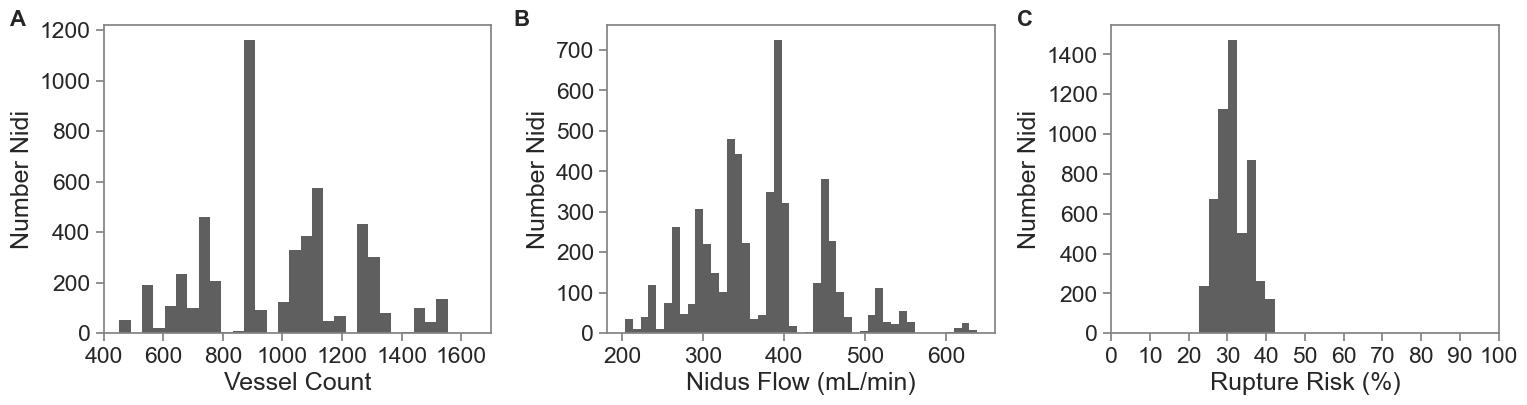

Average total flow is 371.04126372254194 mL/min


In [175]:
sns.set_theme(style="whitegrid", font_scale=1.5)

fig, axs = plt.subplots(1, 3, figsize=(18, 4), sharey=False)
plt.subplots_adjust(wspace=0.3)

sns.histplot(
    filtered_data['Num vessels'], 
    ax=axs[0],
)

sns.histplot(
    filtered_data['Feeder total flow (mL/min)'], 
    ax=axs[1],
)

sns.histplot(
    filtered_data['Mean rupture risk (%)'], 
    ax=axs[2],
    binwidth=2.5
)

####################
# COMMON FORMATTING
####################

labels = 'ABC'

for i, ax in enumerate(axs):

    ax.grid(False)

    plt.setp(
        ax.patches,
        facecolor='#5f5f5f',
        linewidth=0,
    )

    plt.setp(
        ax.spines.values(),
        edgecolor='#838383',
    )

    plt.setp(
        ax,
        ylabel='Number Nidi',
    )

    ax.tick_params(
        axis='x',
        bottom=True,
        color=ax.spines['bottom'].get_edgecolor(),
        which='both',
    )

    ax.tick_params(
        axis='y',
        left=True,
        color=ax.spines['left'].get_edgecolor(),
        which='both',
    )

    ax.text(-0.2, 1.05, labels[i], transform=ax.transAxes, fontsize=16, fontweight='bold', va='top', ha='right')

#######
# AX 0
#######

plt.setp(
    axs[0],
    xlabel='Vessel Count',
    xlim=[400, 1700],
    xticks=range(400, 1700, 200),
    yticks=range(0, 1201, 200),
)

#######
# AX 1
#######

plt.setp(
    axs[1],
    xlabel='Nidus Flow (mL/min)',
    yticks=range(0, 701, 100),
)

#######
# AX 2
#######

plt.setp(
    axs[2],
    xlabel='Rupture Risk (%)',
    xlim=[0, 100],
    xticks=range(0, 101, 10),
    yticks=range(0, 1501, 200)
)

plt.show()

print(f'Average total flow is {np.mean(filtered_data['Feeder total flow (mL/min)'])} mL/min')
